4.1. Реализовать методы Эйлера, Рунге-Кутты и Адамса 4-го порядка в виде программ, задавая в качестве входных данных шаг сетки h. С использованием разработанного программного обеспечения решить задачу Коши для ОДУ 2-го порядка на указанном отрезке. Оценить погрешность численного решения с использованием метода Рунге – Ромберга и путем сравнения с точным решением. 

Вариант 23

Задача Коши:

$$ x^2 y'' + xy' - y -3x^2 = 0 $$ 


$$ y(1) = 3,   y'(1) = 2 $$

$$x \in [1,2], h = 0.1$$



Точное решение: 

$$ y = x^2 + x + \frac{1}{x}$$

In [1]:
import matplotlib.pyplot as plt
import typing
import math


Bad key text.latex.preview in file c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.7.2/lib/matplotlib/mpl-data/matplotlibrc
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default 

In [2]:
def frange(start:float, stop:float, step:float) -> float:
    while start < stop:
        yield start
        start += step

Границы и начальные условия

In [3]:
a, b, h = 1, 2, 0.1

In [4]:
y, y1 = 3, 2

In [5]:
X = [x for x in frange(a, b+h, h)]

In [6]:
def f_accurate(x:float) -> float:
    return x**2 + x + 1/x

Приведём уравнение  к более удобному виду

$$ y'' = 3 + \frac{y}{x^{2}} - \frac{y'}{x}

In [7]:
def f11(x:float, y:float, y1:float) -> float:  
    return 3 + y/x**2 - y1/x

#### Явный метод Эйлера

$$ y_{k+1} = y_k + h f (x_k, y_k) $$

In [8]:
def explicit_Euler_y(x:float, x_end:float, y0:float, z0:float, f:typing.Callable[[float, float, float], float], h:float) -> (list, list):
    Y = [y0]
    Z = [z0]
    for i, xx in enumerate(frange(x, x_end, h)):

        Z.append(Z[i] + h * f(xx, Y[i], Z[i]))
        Y.append(Y[i] + h * Z[i])
    return Z, Y

### Неявный метод эйлера

$$ y_{k+1} = y_k + h f (x_{k+1}, y_{k+1}) $$

In [9]:
def secant_method(eps, y, z, x, h):
    y_tmp = y
    z_tmp = z
    stop = int(1/eps)
    for _ in range(stop):
        y_res = y + h * y_tmp
        z_res = z + h * f11(x, y_tmp, z_tmp)
        z_tmp, y_tmp = z_res, y_res
    return z_res, y_res

def implicit_Euler_y(x_0:float, x_n:float, y_0:float, z_0:float, h:float) -> (list, list):
    
    X = [x_0] + [x + h for x in frange(x_0, x_n, h)]
    n = len(X)
    Y = [y_0] + [0 for _ in range(n-1)]
    Z = [z_0] + [0 for _ in range(n-1)]

    for i in range(n-1):
        Z[i+1], Y[i+1] = secant_method(1 / (len(X) * 10), Y[i], Z[i], X[i+1], h)
    return Z, Y



#### Методы Рунге-Кутты

#### Метод Рунге-Кутты четвертого порядка точности

In [10]:
def runge_knutta_4(x:float, x_end:float, y0:float, z0:float, f:typing.Callable[[float, float, float], float], h:float) -> (list, list):

    X = [x] + [x + h for x in frange(x, x_end, h)]
    n = len(X)
    Y = [y0] + [0 for _ in range(n-1)]
    Z = [z0] + [0 for _ in range(n-1)]
    for i, xx in enumerate(frange(x, x_end, h)):
        K1 = h * Z[i]
        L1 = h * f(xx, Y[i], Z[i])
        K2 = h * (Z[i] + L1 / 2)
        L2 = h * f(xx + h / 2, Y[i] + K1 / 2, Z[i] + L1 / 2)
        K3 = h * (Z[i] + L2/2) 
        L3 = h * f(xx + h / 2, Y[i] +  K2 / 2, Z[i] + L2 / 2)
        K4 = h * (Z[i] + L3)
        L4 = h * f(xx + h, Y[i] +  K3, Z[i] + L3)

        delta_y =  (K1 + 2* K2 + 2 * K3 + K4) / 6
        delta_z =  (L1 + 2* L2 + 2 * L3 + L4) / 6
        Y[i+1] = Y[i] + delta_y
        Z[i+1] = Z[i] + delta_z
    return Z, Y

#### Метод Рунге-Кутты Второго порядка точности

In [11]:
def runge_knutta_2(x:float, x_end:float, y0:float, z0:float, f:typing.Callable[[float, float, float], float], h:float) -> (list, list):
    X = [x] + [x + h for x in frange(x, x_end, h)]
    n = len(X)
    Y = [y0] + [0 for _ in range(n-1)]
    Z = [z0] + [0 for _ in range(n-1)]
    for i, xx in enumerate(frange(x, x_end, h)):
        K1 = h * Z[i]
        L1 = h * f(xx, Y[i], Z[i])
        K2 = h * (Y[i] + L1 / 2)
        L2 = h * f(xx + h / 2, Y[i] + K1 / 2, Z[i] + L1 / 2)

        delta_y =  (K1 +  K2) / 2
        delta_z =  (L1 + L2) / 2
        Y[i+1] = Y[i] + delta_y
        Z[i+1] = Z[i] + delta_z
    return Z, Y

### Метод Адамса

Второго порядка

In [12]:
def Ad2(X:list, h:float, y0:float, z0:float, f11:typing.Callable) -> (list, list):
    z, y = runge_knutta_4(X[0], X[-1], y0, z0, f11, h)

    for i in range(1, len(X) - 1):
        z[i+1] = z[i] + h * (3 * f11(X[i], y[i], z[i]) - f11(X[i-1], y[i-1], z[i-1])) / 2
        y[i+1] = y[i] + h * (3 * z[i] - z[i-1]) / 2

    return z, y


Четвертого порядка

In [13]:
def Ad4(X:list, h:float, y0:float, z0:float, f11:typing.Callable) -> (list, list):
    z, y = runge_knutta_4(X[0], X[-1], y0, z0, f11, h)

    for i in range(3, len(X) - 1):
        z[i+1] = z[i] + h/24 * (55 * f11(X[i], y[i], z[i]) - 59 * f11(X[i-1], y[i-1], z[i-1]) + 37 * f11(X[i-2], y[i-2], z[i-2]) - 9 * f11(X[i-3], y[i-3], z[i-3]))
        y[i+1] = y[i] + h/24 * (55 * z[i] - 59 * z[i-1] + 37 * z[i-2] - 9 * z[i-3])

    return z, y

### Запуск

In [14]:
euler = explicit_Euler_y(a, b, y, y1, f11, h)[1]
euler_imp = implicit_Euler_y(a, b, y, y1, h)[1]
rg2 = runge_knutta_2(a, b, y, y1, f11, h)[1]
rg4 = runge_knutta_4(a, b, y, y1, f11, h)[1]
ad2 = Ad2(X, h, y, y1, f11)[1]
ad4 = Ad4(X, h, y, y1, f11)[1]
y_valid = [f_accurate(x) for x in X]

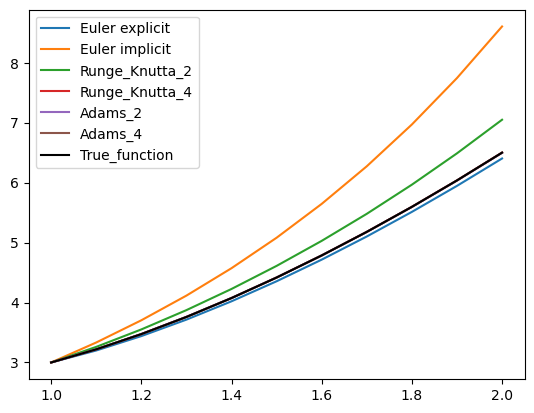

In [15]:
plt.plot(X, euler, label='Euler explicit')
plt.plot(X, euler_imp, label='Euler implicit')
plt.plot(X, rg2, label='Runge_Knutta_2')
plt.plot(X, rg4, label='Runge_Knutta_4')
plt.plot(X, ad2, label='Adams_2')
plt.plot(X, ad4, label='Adams_4')
plt.plot(X, y_valid, label='True_function', color='black')
plt.legend()
plt.show()

### Оценки погрешностей

In [16]:
def runge_rombert(Fh:float, Fkh:float, k:float, p:float) -> float:
    return Fh + ((Fh - Fkh) / (k**p - 1))

def mse(y_pred:list, y_valid:list) -> float:
    return math.sqrt(sum((y1 - y0) ** 2 for y1, y0 in zip(y_pred, y_valid)))

Ошибка методом Рунге Ромберта Ричардсона

In [17]:
print('Runge Rombert Error Explicit Euler', mse(euler, [runge_rombert(e, e_10, h / (h/10), 1) for e, e_10 in zip(euler, explicit_Euler_y(a, b, y, y1, f11, h/10)[1][0::10])] ))
print('Runge Rombert Error Implicit Euler', mse(euler_imp, [runge_rombert(e, e_10, h / (h/10), 1) for e, e_10 in zip(euler_imp, implicit_Euler_y(a, b, y, y1, h/10)[1][0::10])] ))
print('Runge Rombert Error Runge_Knutta_2', mse(rg2, [runge_rombert(rg, rgg,h / (h/10), 2) for rg, rgg in zip(rg2,  runge_knutta_2(a, b, y, y1, f11, h/10)[1][0::10])]))
print('Runge Rombert Error Runge_Knutta_4', mse(rg4, [runge_rombert(rg, rgg,h / (h/10), 4) for rg, rgg in zip(rg4,  runge_knutta_4(a, b, y, y1, f11, h/10)[1][0::10])]))
print('Runge Rombert Error Adams_2', mse(ad2,[runge_rombert(ad, add, h / (h/10), 2) for ad, add in zip(ad2, Ad2(X, h/10, y, y1, f11)[1][0::10])]))
print('Runge Rombert Eerror Adams_4', mse(ad4, [runge_rombert(ad, add, h / (h/10), 4) for ad, add in zip(ad4, Ad4(X, h/10, y, y1, f11)[1][0::10])]))

Runge Rombert Error Explicit Euler 0.021477289859407313
Runge Rombert Error Implicit Euler 0.0740857803807944
Runge Rombert Error Runge_Knutta_2 0.0017719974317825684
Runge Rombert Error Runge_Knutta_4 1.4619226090897327e-09
Runge Rombert Error Adams_2 6.68840770371929e-05
Runge Rombert Eerror Adams_4 2.0029836153087567e-07


Ошибка в сравнении с точным значением

In [18]:
print('Error Explicit Euler', mse(euler, y_valid))
print('Error Implicit Euler', mse(euler_imp, y_valid))
print('Error Runge_Knutta_2', mse(rg2, y_valid))
print('Error Runge_Knutta_4', mse(rg4, y_valid))
print('Error Adams_2', mse(ad2, y_valid))
print('Error Adams_4', mse(ad4, y_valid))

Error Explicit Euler 0.21450048764033647
Error Implicit Euler 3.4707535305592576
Error Runge_Knutta_2 0.9341967192238859
Error Runge_Knutta_4 1.4619162011190374e-05
Error Adams_2 0.0060362219275877935
Error Adams_4 0.0005266391671021366
